In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [37]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import pickle

In [38]:
df = pd.read_csv('/Users/sanghyun/Desktop/Coding/HalfMoon1008.github.io/PJ_DLflask/static/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
df.shape

(1599, 12)

In [40]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [41]:
data = df.drop(columns=['quality']).copy()
target = df.quality.copy()

In [42]:
from sklearn import model_selection
train_data, test_data, train_target, test_target = model_selection.train_test_split(data, target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

In [44]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [48]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=11, units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # elu or relu (or layers.ELU / layers.LeakyReLU)

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=1, activation=None))

In [49]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error]) 

In [50]:
history = model.fit(train_data, train_target, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [51]:
result = model.evaluate(test_data, test_target)

print('loss (mean_squared_error) :', result[0])

15/15 [==============================] - 0s 8ms/step - loss: 0.4830 - mean_squared_error: 0.4830
loss (mean_squared_error) : 0.4829958379268646


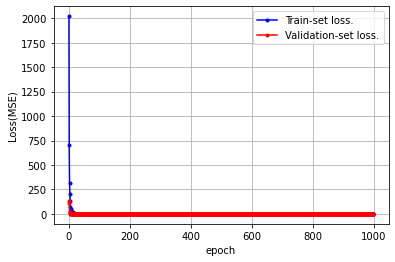

In [52]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [53]:
# Prediction on test data
model.predict(test_data)

15/15 [==============================] - 0s 5ms/step


array([[5.39142  ],
       [4.225105 ],
       [6.1261783],
       [5.0250173],
       [4.7825923],
       [5.0031447],
       [5.0761347],
       [5.559113 ],
       [4.7927814],
       [4.9507565],
       [5.1182976],
       [5.330648 ],
       [5.5322843],
       [5.366988 ],
       [5.178716 ],
       [5.696041 ],
       [7.1453443],
       [5.4007664],
       [5.2607303],
       [5.0912976],
       [5.776846 ],
       [5.264561 ],
       [5.4206877],
       [5.605593 ],
       [5.1571875],
       [4.8634143],
       [5.135069 ],
       [6.0742016],
       [4.8438444],
       [5.8565536],
       [5.7835994],
       [5.3564873],
       [5.3204637],
       [5.2278013],
       [5.445709 ],
       [5.7108765],
       [5.0625725],
       [5.361501 ],
       [5.6929407],
       [5.716499 ],
       [5.1507425],
       [6.024921 ],
       [5.8153486],
       [6.4140964],
       [5.5594106],
       [5.0130243],
       [5.2051554],
       [5.4034967],
       [5.2233396],
       [5.466587 ],


In [60]:
sample_data = np.array([[7.9, 0.52, 0.26, 2.2, 0.79, 14, 38, 0.99, 3.31, 0.62, 10.2]])

In [61]:
model.predict(sample_data)

1/1 [==============================] - 0s 264ms/step


array([[5.1992545]], dtype=float32)